# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 95.3 MB/s eta 0:00:00


In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix



from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Recall, Precision, AUC
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Overview**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Python Course/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Python Course/Test.csv')

# **Exploratory Data Analysis**

                            Sanity Check
*   My sanity check will include both Test and Training data just to check for consistency.
*   No distribution plots or target variable exploration on ***TEST*** data since that may bias me .


### Displaying the first few rows of the dataset

In [ ]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


* Checking if both train and test have the same column name

In [ ]:
print(set(train_df.columns) == set(test_df.columns))

True


In [ ]:
train_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [ ]:
test_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120451,1.634804,1.251259,4.035944,3.291204,-2.932230,-1.328662,1.754066,-2.984586,1.248633,...,9.979118,0.063438,0.217281,3.036388,2.109323,-0.557433,1.938718,0.512674,-2.694194,0
4996,-5.172498,1.171653,1.579105,1.219922,2.529627,-0.668648,-2.618321,-2.000545,0.633791,-0.578938,...,4.423900,2.603811,-2.152170,0.917401,2.156586,0.466963,0.470120,2.196756,-2.376515,0
4997,-1.114136,-0.403576,-1.764875,-5.879475,3.571558,3.710802,-2.482952,-0.307614,-0.921945,-2.999141,...,3.791778,7.481506,-10.061396,-0.387166,1.848509,1.818248,-1.245633,-1.260876,7.474682,0
4998,-1.703241,0.614650,6.220503,-0.104132,0.955916,-3.278706,-1.633855,-0.103936,1.388152,-1.065622,...,-4.100352,-5.949325,0.550372,-1.573640,6.823936,2.139307,-4.036164,3.436051,0.579249,0
4999,-0.603701,0.959550,-0.720995,8.229574,-1.815610,-2.275547,-2.574524,-1.041479,4.129645,-2.731288,...,2.369776,-1.062408,0.790772,4.951955,-7.440825,-0.069506,-0.918083,-2.291154,-5.362891,0


In [ ]:
test_df.shape

(5000, 41)

In [ ]:
train_df.shape

(20000, 41)

There are more rows in Training data set than in The Testing Dataset.

*   Train_df has 20,000 rows and 41 columns
*   Test_df has 5,000 rows and 41 columns



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

*  V1      19982 non-null  float64 This tells me there are missing values .
*  V2      19982 non-null  float64 Tells me there are missing values

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [ ]:
print(train_df.isnull().sum())


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64


* There are some missing values in Training 20,000  - 19982  = 18 Nan Missing values
* The missing values represent only 0.09% of the data . I can say that there is not much of an impact but may have to impute later.

In [ ]:
print(test_df.isnull().sum())

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64


* There are some missing values 5000-4995 = 5 v1
* 5000-4994 = 4 on v2
There is about there is a 0.12% impact of the data missing

In [ ]:
train_df["Target"].value_counts(1)

,proportion
Target,
0,0.9445
1,0.0555


In [ ]:
test_df["Target"].value_counts(1)

,proportion
Target,
0,0.9436
1,0.0564


The proportion on both training and testing classes are very close.
Target variable **0** is my negative class and **1** is my postive class.
                  
                  Train
* The training data aprox of 94.45% OF The samples are belongs to 0 my negative class
* 5.55% of belong to the postive class of 1
                
                  Test
* Test 94.36% belongs to the negative class 0
* 5.64% belongs to postive class 1

Both datasets are consistent in class distribution , there is no significant class imbalance shift between training and testing.

However, the target variable is imblanaced overall, with class 0 being much more frequent than class 1


The model may learn to always predict 0, and still appear accruate!!!! Even though it fails to detect classes 1 cases .

                             My solution
special care will be needed during my model traing : like class weights , oversamplling or evalutation metrics such as f1 score or precision ans recal instead of accruacy alone.

## Univariate analysis

The dataset contains numerical features labeled V1-V39 which likeley represent transformed or engineered variables derived by anonymouse techqunies . These columuns or features capture underlying patterns in the original data while preserving confidentiality . The target column indicates the class clabel 0 represents normal cases and 1 represents anomaloy or special events.

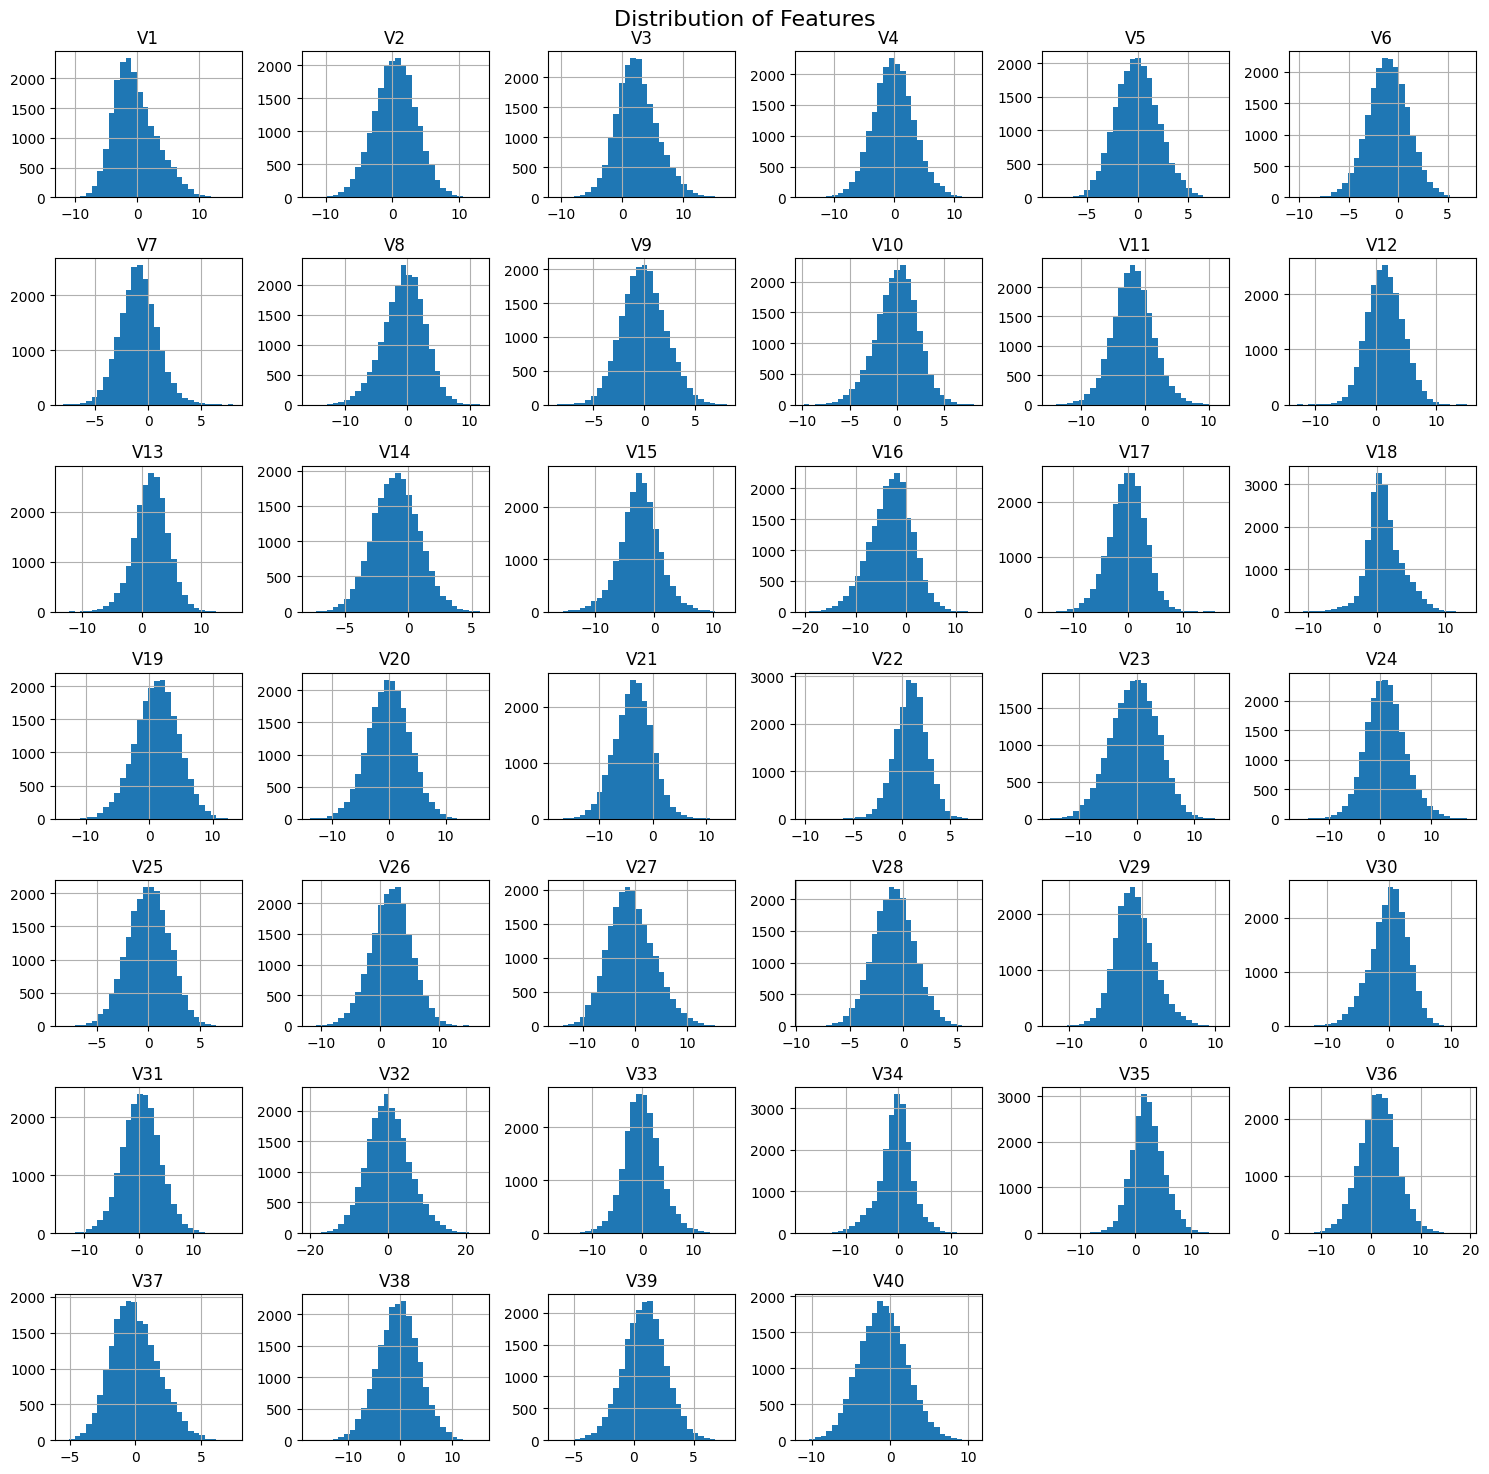

In [ ]:
features = [col for col in train_df.columns if col not in ['Target']]

train_df[features].hist(figsize=(15,15), bins=30)
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout()
plt.show()

During this analysis I found that several features showed very obviouse skewness in there distribution:
Right-Skwed : V1,V3,V18
Left-Skwed : V16

My right skwed most data points are concentrated at lower values with few **large outliers**.

left skwed most data points have higher value with very **small outliers**.

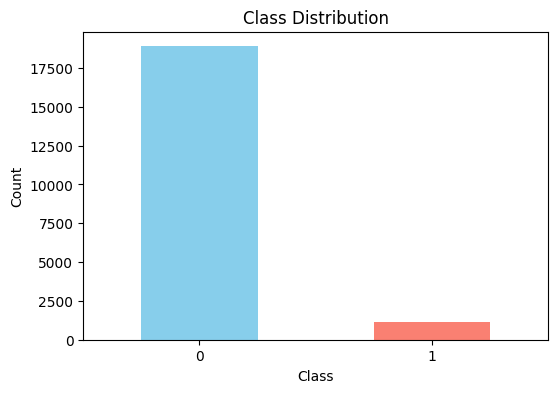

In [ ]:
plt.figure(figsize=(6,4))
train_df['Target'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In this univariate analysis we can see that there are alot more 0  or records that represent normal case / Negative
The 1 which is the cases with anomalies / postive cases.

* There are over 17500 records that represent the normal case
* The anolmalies only have less than 2500 records

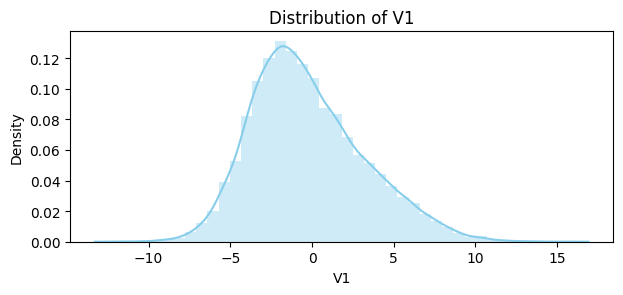

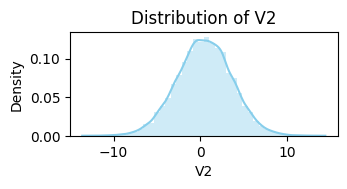

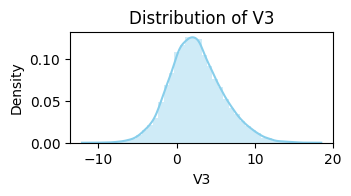

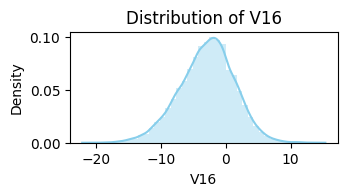

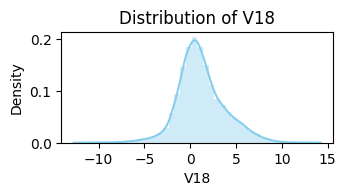

In [ ]:
selected_cols = ['V1', 'V2', 'V3','V16', 'V18']

plt.figure(figsize=(12,8))

for i, col in enumerate(selected_cols,1):
  plt.subplot(3,2,i)
  sns.distplot(train_df[col],bins=40,kde=True, color='skyblue')
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

Again this example of several festures shows that columsn like v1,v3 and v18 have postive skew showing a concentration of low values while v16 is negative indicating the oposite

In [ ]:
train_df.skew()

,0
V1,0.545156
V2,-0.039034
V3,0.316563
V4,0.096741
V5,0.125183
V6,-0.027787
V7,0.182190
V8,-0.263668
V9,0.104628
V10,-0.246411


The dataset shows moderate right skew in several predictors  V1, V29, V37, V3, suggesting many small observations with fewer extreme large values. The Target column is strongly skewed 3.88 due to class imbalance

In [ ]:
train_df.kurt()

,0
V1,0.170757
V2,0.081407
V3,0.309815
V4,0.236595
V5,-0.043896
V6,0.049623
V7,0.495062
V8,0.102042
V9,-0.006050
V10,0.220317


Multiple V-columns	High kurtosis	Indicates heavy tails which are potential extreme values.
 In this model V23, V25, V14, V40	Lowest kurtosis	Less tail-heavy closer to normal.

                                 overall
The training data shows mild to moderate right skew in several predictors like V1, V29, V37, V3.

This shows that most values cluster low with only a few large observations.
The **Target** variable is highly skewed due to imbalanced failure occurrences. Also several variables exhibit high kurtosis this means that heavy tails and possible outliers that may require transformation or robust modeling techniques


## Bivariate Analysis

Plotting top 5 features based on the KURT and Skewness


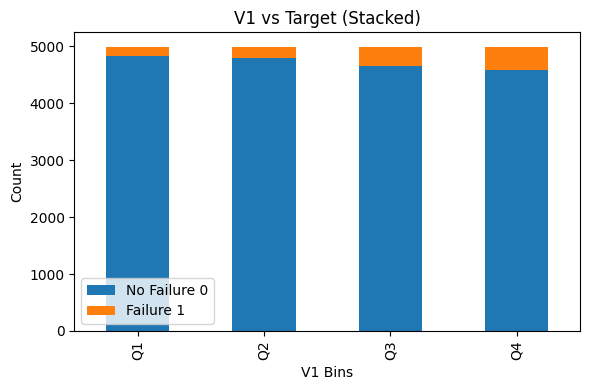

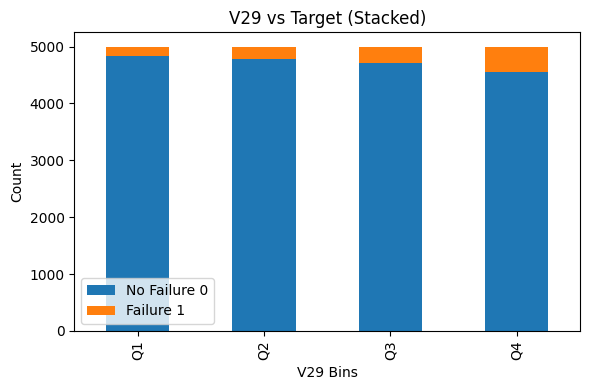

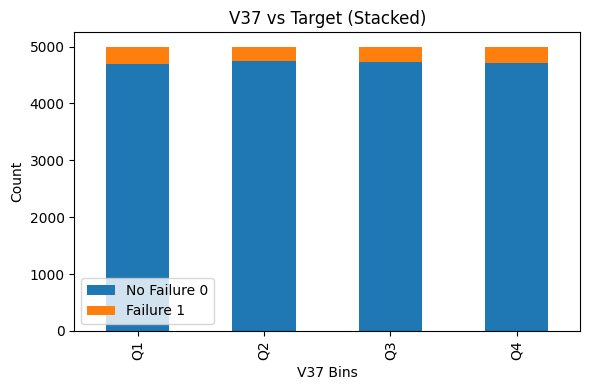

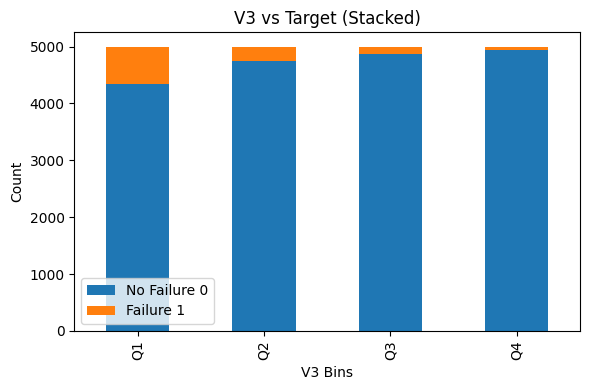

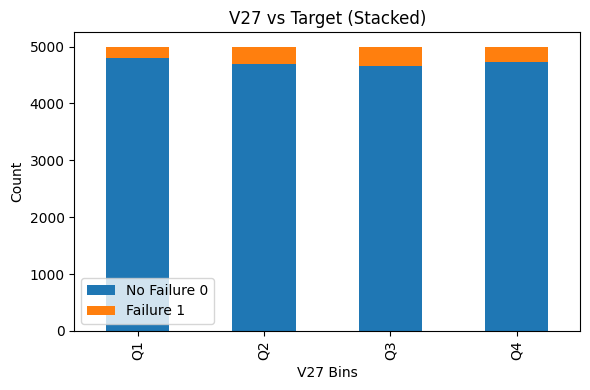

In [ ]:
df_train = train_df.copy()
target = "Target"
top_features = ["V1", "V29", "V37", "V3", "V27"]

def stacked_plots(features, df, target=target):
    for feature in features:
        if feature not in df.columns:
            print(f"{feature} not found.")
            continue

        df_bin = df.copy()
        try:
            df_bin["bin"] = pd.qcut(df_bin[feature], q=4,
                                    labels=["Q1","Q2","Q3","Q4"],
                                    duplicates="drop")
        except Exception as e:
            print(f"Skipping {feature} — {e}")
            continue

        ct = pd.crosstab(df_bin["bin"], df_bin[target])
        ct = ct.reindex(columns=[0, 1], fill_value=0)  # keep legend 0 then 1

        ax = ct.plot(kind="bar", stacked=True, figsize=(6,4))
        plt.title(f"{feature} vs {target} (Stacked)")
        plt.xlabel(f"{feature} Bins")
        plt.ylabel("Count")
        plt.legend(["No Failure 0", "Failure 1"])
        plt.tight_layout()
        plt.show()

print("Plotting top 5 features based on the KURT and Skewness")
stacked_plots(top_features, df_train)


My stacked bar analysis shows that V3 provides the strongest signal, with noticeably higher failure rates in its lower quartiles. V1 and V29 also display meaningful trends, where higher values correspond to slightly increased failure likelihood. V37 and V27 show weaker patterns, but still contribute modest separation between failure and non-failure groups.

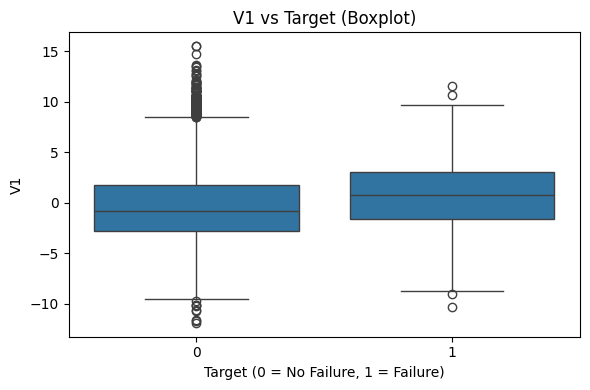

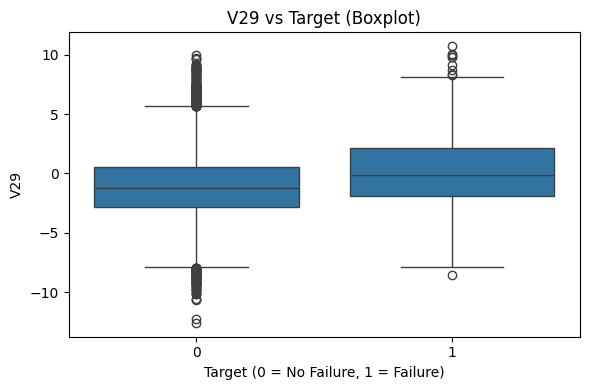

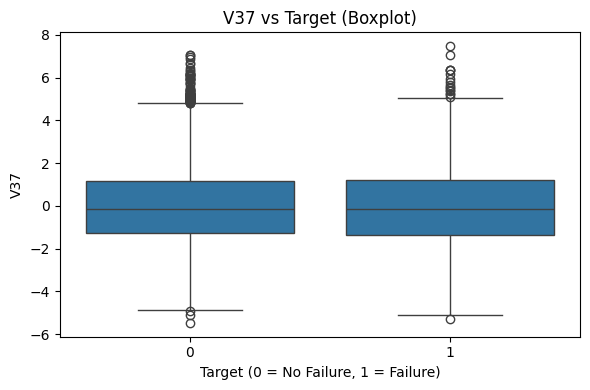

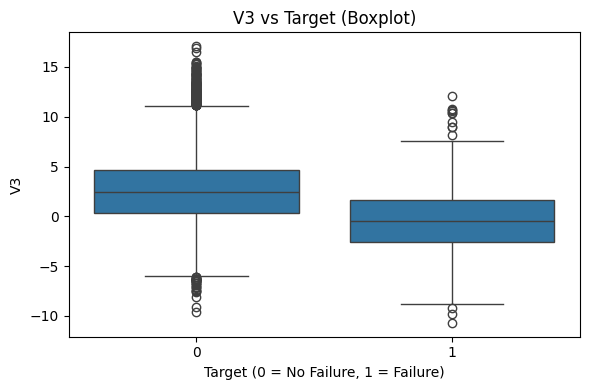

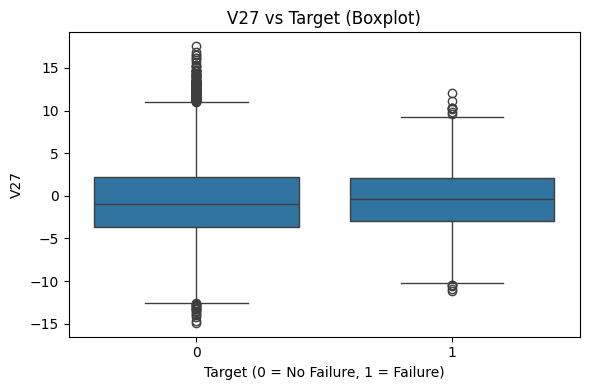

In [ ]:
target = "Target"
top_features = ["V1", "V29", "V37", "V3", "V27"]

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=feature, data=df_train)
    plt.title(f"{feature} vs {target} (Boxplot)")
    plt.xlabel("Target (0 = No Failure, 1 = Failure)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

boxplots show that V3 has the clearest separation, with failure cases 1s tending to have noticeably lower values than non-failures.

 V1 and V29 also show mild differences, with failures generally occurring at slightly higher values. V37 and V27 display considerable overlap between classes, suggesting weaker predictive influence compared to the other variables

All columns

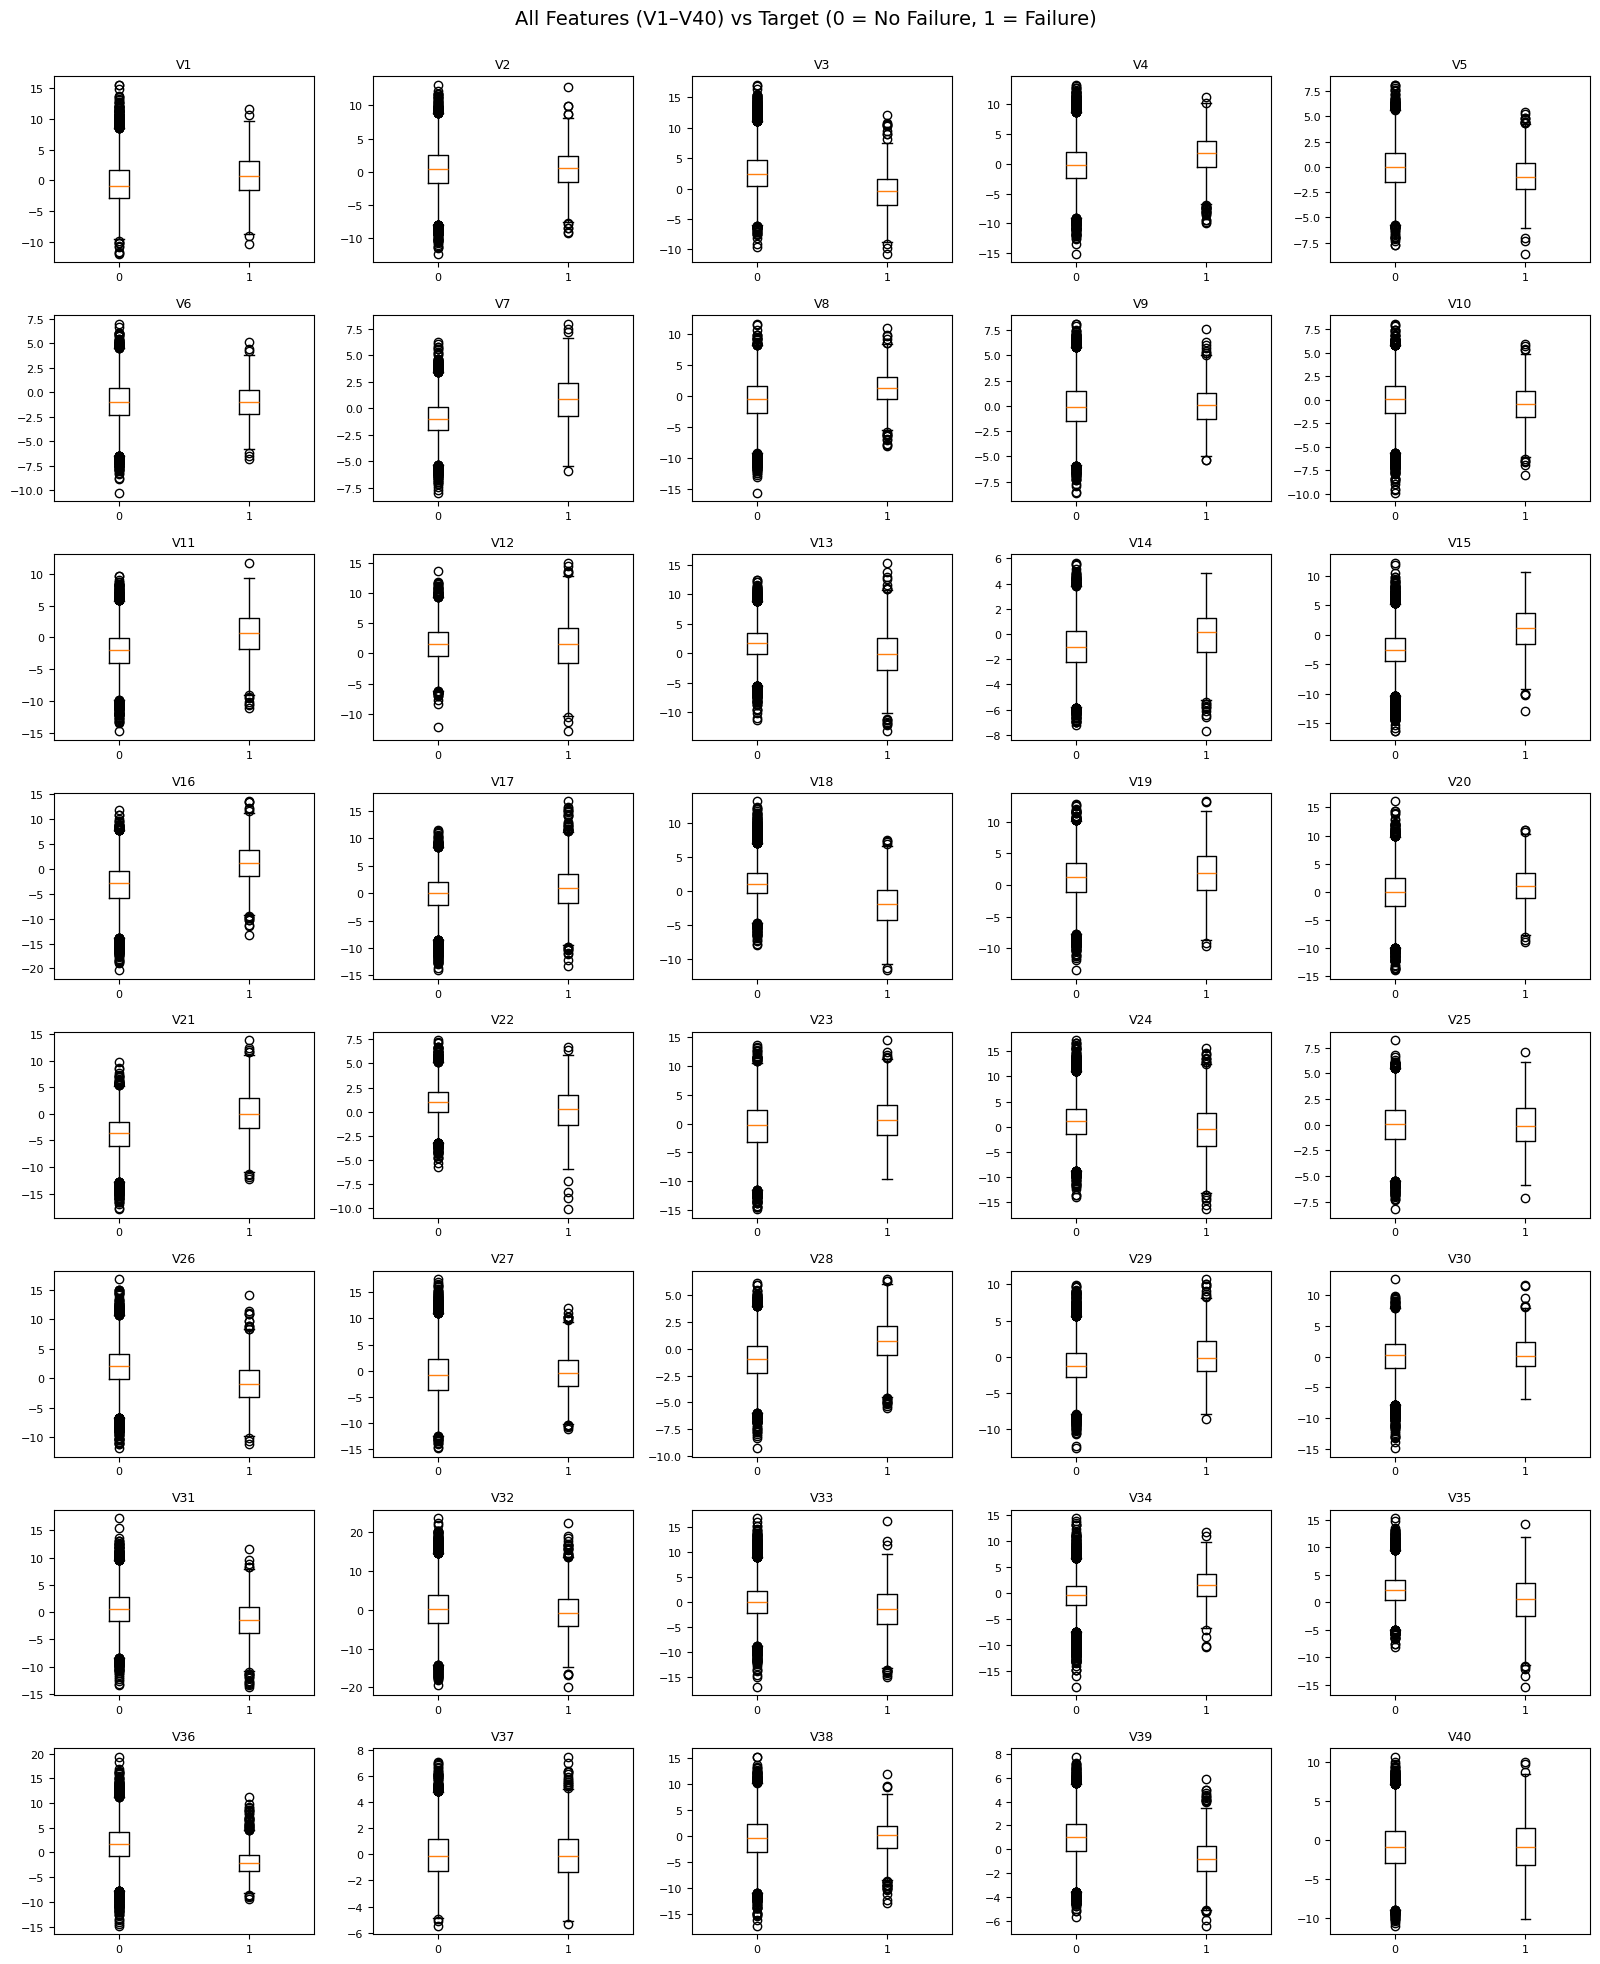

In [ ]:
target = "Target"

# Grab all feature v1 - v40
feature_cols = [c for c in df_train.columns if c.startswith("V")]
# 8x5 = 40
n = len(feature_cols)
rows, cols = 8, 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    ax = axes[i]
    data0 = df_train.loc[df_train[target] == 0, col].dropna()
    data1 = df_train.loc[df_train[target] == 1, col].dropna()
    ax.boxplot([data0, data1], labels=["0", "1"], showfliers=True)
    ax.set_title(col, fontsize=9)
    ax.tick_params(axis='both', labelsize=8)

# just in case I will hide the unsused axies
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("All Features (V1–V40) vs Target (0 = No Failure, 1 = Failure)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Across most features the distributions for failure vs non-failure overlap ALOT! indicating modest univariate separation. A few variables notably V3, V1, and V29 show clearer median shifts or spread differences between classes, suggesting stronger predictive potential

# **Data Preprocessing**

train , impute ,scale

In [ ]:
# Features & target
feature_cols = [c for c in train_df.columns if c.startswith("V")]
target_col = "Target"

# Impute learn medians on train and  apply to both)
median_V1 = train_df["V1"].median()
median_V2 = train_df["V2"].median()
train_df["V1"] = train_df["V1"].fillna(median_V1)
train_df["V2"] = train_df["V2"].fillna(median_V2)
test_df["V1"]  = test_df["V1"].fillna(median_V1)
test_df["V2"]  = test_df["V2"].fillna(median_V2)

# Build raw matrices
X_train_raw = train_df[feature_cols]
y_train = train_df[target_col].astype(int).values
X_test_raw  = test_df[feature_cols]
y_test = test_df[target_col].astype(int).values

# Scale (fit on TRAIN only)
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

X_train.shape, X_test.shape



((20000, 40), (5000, 40))

Missing values were found only in V1 and V2 lessthan 0.1%

I performed the **median** imputation using the training set medians.

The same values were applied to the test set to avoid data leakage and maintain consistent preprocessing

Because the predictor variables V1 V40 are numeric and  on different scales StandardScaler was applied.

The scaler was fit only on the training data and then applied to the test set to prevent data leakage

This ensures that all features contribute more equally and helps my gradientbased model converge more efficiently.


            NO ENCONDING
Train and test dataset contains 40 predictor variables V1 to V40 all of which are continuous numeric features.

Since there are no categorical variables, no encoding step is required.

Encoding methods such as one-hot or label encoding would be necessary only if nonnumeric categories were present.
 this preprocessing step is intentionally skipped

            outliers
Outliers were present across many features.
Which is expected given the sensor-based nature of the dataset.

Although neural networks can be sensitive to extreme values these readings likely contain meaningful signal about abnormal operating conditions that precede failure.

I avoided the outlier removalthe loss of important information.

StandardScaler was applied to whithstand scale effects
and preserving the underlying distribution.

This approach maintains data integrity while still preparing features appropriately for neural network training.

In [ ]:
def get_class_weights(y):
    counts = np.bincount(y)
    total = len(y)
    weights = total / counts
    return {i: float(weights[i]) for i in range(len(weights))}

cw_dict = get_class_weights(y_train)
cw_dict


{0: 1.0587612493382743, 1: 18.01801801801802}

In [ ]:
def plot_history(history, metric):
    tr = history.history.get(metric)
    va = history.history.get('val_' + metric)
    if tr is None or va is None:
        print(f"Metric '{metric}' or 'val_{metric}' not found in history.")
        return
    plt.figure(figsize=(6,4))
    plt.plot(tr)
    plt.plot(va)
    plt.title(f'{metric.capitalize()} over epochs')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.grid(True)
    plt.show()

In [ ]:

def model_performance(model, X, y, threshold=0.5):
    probs = model.predict(X).flatten()
    preds = (probs > threshold).astype(int)
    return pd.DataFrame({
        "Accuracy":  [accuracy_score(y, preds)],
        "Recall":    [recall_score(y, preds)],
        "Precision": [precision_score(y, preds)],
        "F1 Score":  [f1_score(y, preds)]
    })



In [ ]:
def plot_confusion(model, X, y, threshold=0.5):
    probs = model.predict(X).flatten()
    preds = (probs > threshold).astype(int)
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest')
    plt.title("Confusion Matrix")
    plt.xticks([0,1], ["Pred 0","Pred 1"])
    plt.yticks([0,1], ["True 0","True 1"])
    for (i,j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha='center', va='center')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

Because this problem is about predicting windturbine failures the costs are:
True Positive **TP** : correctly detect failing generator : probably a repair cost.

False Negative **FN** : missed failure :  replacement cost most expensive because you replaced for not reason

False Positive **FP**: unnecessary inspection : cheaper than repair

***FN*** is the worst outcome

prioritize recall /sensitivity for the failure class
since missing a failure false negative leads to generator replacement the most expensive outcome recall on the failure class was selected as the primary evaluation criterion.

F1-score was used as a secondary metric to balance recall against false positives which still carry cost via unnecessary inspections ROC AUC was additionally monitored to evaluate global class separation

In [ ]:
input_dim = X_train.shape[1]

model_0 = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(1, activation='sigmoid')
])

model_0.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

Input  Hidden dense:  40 input features V1-V40
A Dense layer with 32 units has
parameters = inputs * units + biases = (40 * 32) + 32 = 1,312

Thats why the first layer shows Param # = 1,312 and

Output Shape = None, 32 the None is the batch size, which is flexible

Hidden Output dense_1: The output layer has 1 unit sigmoid for binary classification
Parameters = (32 * 1) + 1 bias = 33
matching Param # = 33 and Output Shape = None, 1

Totals: 1,312 + 33 = 1,345 total parameters
all trainable or no frozen layers

which is why Trainable params = 1,345 and Non-trainable params = 0

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [ ]:
history_0 = model_0.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8094 - auc: 0.8619 - loss: 0.8880 - precision: 0.2012 - recall: 0.8014 - val_accuracy: 0.8992 - val_auc: 0.9116 - val_loss: 0.2940 - val_precision: 0.3414 - val_recall: 0.8475
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9117 - auc: 0.9340 - loss: 0.5969 - precision: 0.3714 - recall: 0.8826 - val_accuracy: 0.9308 - val_auc: 0.9171 - val_loss: 0.2420 - val_precision: 0.4405 - val_recall: 0.8404
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9322 - auc: 0.9396 - loss: 0.5435 - precision: 0.4408 - recall: 0.8851 - val_accuracy: 0.9408 - val_auc: 0.9202 - val_loss: 0.2183 - val_precision: 0.4857 - val_recall: 0.8440
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9428 - auc: 0.9429 - loss: 0.5155 - precision: 0.4876 - recall: 0.8864 - val_accuracy: 0.9446 - val_auc: 0.9223 - val_loss: 0.2053 - val_precision: 0.5053 - val_recall: 0.8440
Epoch 5/30
625/625 ━━━━━━━━━━━━━

The model shows consistently high recall around 0.90 on the training set and strong validation recall 0.86.

Tis is indicating that it is able to correctly identify most failure cases. Validation accuracy 0.96 and AUC 0.93 remain sam/stable through later epochs with steadily decreasing validation loss suggesting the model is learning effectively without overfitting

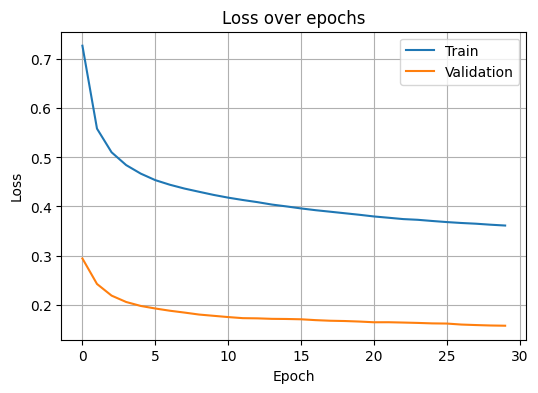

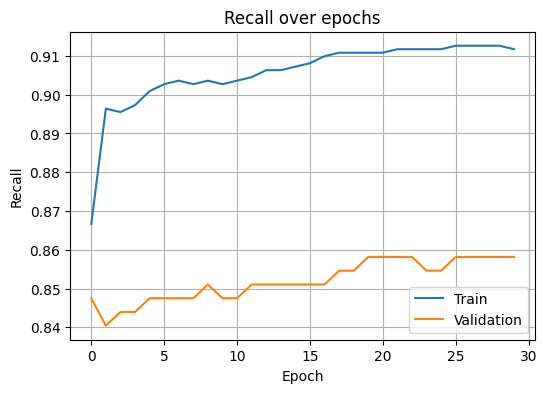

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.96595,0.918018,0.633313,0.74954


,Accuracy,Recall,Precision,F1 Score
0,0.96,0.858156,0.60199,0.707602


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


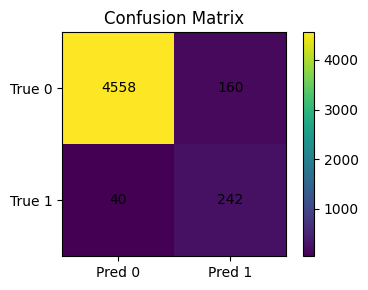

In [ ]:
plot_history(history_0, "loss")
plot_history(history_0, "recall")

train_perf = model_performance(model_0, X_train, y_train)
test_perf  = model_performance(model_0, X_test, y_test)
display(train_perf)
display(test_perf)

plot_confusion(model_0, X_test, y_test)

The neural network achieved strong overall performance, with training accuracy of 0.97 and test accuracy of aproximantly 0.96indicating good generalization

More importantly for this failure prediction task
recall remained high on both sets 0.92 train
0.86 test meaning the model correctly identified most failure cases

Precision was somewhat lower around 0.63 train around 0.60 test reflecting a higher number of false positives which is acceptable given that the business cost of missing failures outweighs the cost of unnecessary inspections

Overall, Model 0 provides a solid baseline with strong recall and balanced F1 scores 0.75 train0.71 test making it effective at catching failures while maintaining reasonable precision

The loss curves show a steady decrease for both training and validation sets.Validation loss remaining lower than training loss this suggest that the model is learning effectively without signs of overfitting.

The recall curves show consistently high performance with training recall gradually improving to aprox 0.91 and validation recall stabilizing around  aprox 0.86 indicating that the model is reliably detecting the majority of failure cases.

Both graphs curves demonstrate stable learning and good generalization especially in terms of recall which is the most critical

# **Model Performance Improvement**

## Model 1

In [ ]:
from tensorflow.keras.optimizers import Adam


input_dim = X_train.shape[1]

model_1 = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(1, activation='sigmoid')
])

model_1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

Total Parameters = 1,312 + 33 = 1,345

So Model 1 has the same architecture as Model 0:

40 input features -- 32 hidden units

32 -- 1 output neuron

Because we only changed the optimizer SGD to Adam the parameter count remains unchanged which is exactly what I want
This ensures any change in performance is due to the optimizer not a change in architecture

In [ ]:
history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7437 - auc: 0.8828 - loss: 0.8764 - precision: 0.1713 - recall: 0.8583 - val_accuracy: 0.9212 - val_auc: 0.9150 - val_loss: 0.2580 - val_precision: 0.4041 - val_recall: 0.8369
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9183 - auc: 0.9341 - loss: 0.5837 - precision: 0.3925 - recall: 0.8895 - val_accuracy: 0.9454 - val_auc: 0.9203 - val_loss: 0.2143 - val_precision: 0.5098 - val_recall: 0.8333
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9387 - auc: 0.9405 - loss: 0.5254 - precision: 0.4688 - recall: 0.8838 - val_accuracy: 0.9568 - val_auc: 0.9226 - val_loss: 0.1948 - val_precision: 0.5805 - val_recall: 0.8440
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9504 - auc: 0.9452 - loss: 0.4946 - precision: 0.5289 - recall: 0.8865 - val_accuracy: 0.9612 - val_auc: 0.9245 - val_loss: 0.1830 - val_precision: 0.6134 - val_recall: 0.8440
Epoch 5/30
625/625 ━━━━━━━━━━━━━

Model 1 shows slightly **improved** performance versus Model 0 with validation accuracy increasing to 0.97 and validation AUC rising to 0.94, indicating better overall class separation. Validation loss continues to decrease steadily, suggesting stronger convergenc
while recall remains stable around aprox 0.86 and precision improves slightly to aprox 0.70, demonstrating a better balance between correctly identifying failures and limiting false positives. Overall, switching from SGD to Adam yields faster and smoother optimization with modest gains in both discriminative power AUC and precision.

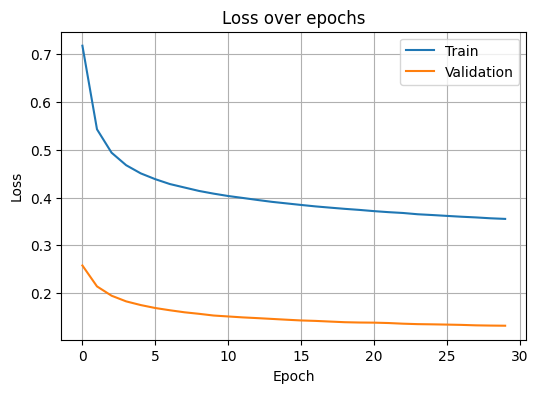

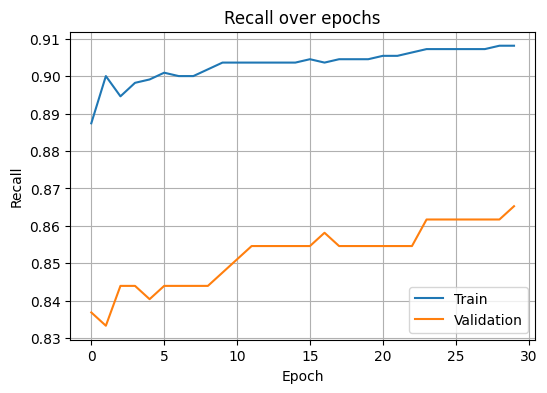

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97795,0.911712,0.746863,0.821095


,Accuracy,Recall,Precision,F1 Score
0,0.9716,0.865248,0.701149,0.774603


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


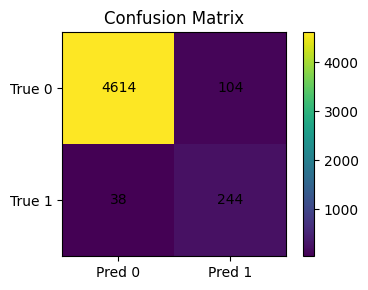

In [ ]:
plot_history(history_1, "loss")
plot_history(history_1, "recall")

train_perf_1 = model_performance(model_1, X_train, y_train)
test_perf_1  = model_performance(model_1, X_test, y_test)

display(train_perf_1)
display(test_perf_1)

plot_confusion(model_1, X_test, y_test)

                loss curve
The loss curves show smooth and consistent decreases for both training and validation sets with validation loss remaining lower than training loss suggesting stable learning and no overfitting. The recall curves likewise trend upward and stabilize confirming that the model becomes better at identifying failures over time

              Training acuracy
Model 1 demonstrates improved performance over Model 0 with training accuracy of 0.98 and test accuracy of 0.97
indicating strong generalization and **Recall **remains high at 0.91 train and  0.87 test meaning the model continues to **detect most failure** cases while precision improves to 0.75 train and 0.70 test showing a better balance between catching failures and reducing false positives.

                confusion matrix
TN=4614, FP=104, FN=38, TP=244, false negatives remain low relative to true positives, which is critical because missed failures are the costliest outcome. Overall, Model 1 delivers better recall, higher precision, and stronger F1 scores than Model 0, validating that switching to the Adam optimizer improves model learning and reliability.

## Model 2

In [ ]:
input_dim = X_train.shape[1]

model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

Model 2 introduces an additional hidden layer to increase the network capacity compared to previous models 0 and 1 . The first Dense layer contains 32 neurons and takes all 40 input features then it is producing 1,312 parameters A second hidden layer with 16 neurons adds 528 parameters allowing the model to learn more complex feature interactions.

The final output layer consists of a single sigmoid neuron with 17 parameters for binary classification.

In total, the model contains 1,857 trainable parameters, up from 1,345 in earlier models reflecting the added depth and capacity while still remaining lightweight and efficient.

In [ ]:
history_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7692 - auc: 0.8697 - loss: 0.8606 - precision: 0.1864 - recall: 0.8132 - val_accuracy: 0.9480 - val_auc: 0.9246 - val_loss: 0.2133 - val_precision: 0.5241 - val_recall: 0.8475
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9473 - auc: 0.9434 - loss: 0.4889 - precision: 0.5117 - recall: 0.8940 - val_accuracy: 0.9664 - val_auc: 0.9304 - val_loss: 0.1652 - val_precision: 0.6566 - val_recall: 0.8475
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9654 - auc: 0.9524 - loss: 0.4252 - precision: 0.6295 - recall: 0.8973 - val_accuracy: 0.9718 - val_auc: 0.9334 - val_loss: 0.1497 - val_precision: 0.7055 - val_recall: 0.8582
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9704 - auc: 0.9594 - loss: 0.3920 - precision: 0.6728 - recall: 0.8989 - val_accuracy: 0.9730 - val_auc: 0.9345 - val_loss: 0.1424 - val_precision: 0.7155 - val_recall: 0.8652
Epoch 5/30
625/625 ━━━━━━━━━━━━

Model 2 continues to improve representation learning, achieving high training accuracy 0.98 and very strong AUC 0.99 this is  indicating excellent separation between failure and nonfailure cases.

Validation accuracy remains stable around 0.97 and with validation AUC holding near 0.94 this is showing that the model generalizes well

Training recall rises to 0.92 while validation recall remains steady at 0.86, meaning the model is still reliably detecting most failure events

though gains over Model 1 are modest. Precision fluctuates across epochs training: 0.75 and validation: 0.65 to 0.70 suggesting the deeper model may trade a few more false positives for slightly stronger recallthis aligns with business priorities.

Overall adding a second hidden layer improves AUC and stabilizes recall though precision varies, and validation loss shows some fluctuation near the end, hinting at the early signs of mild overfitting.

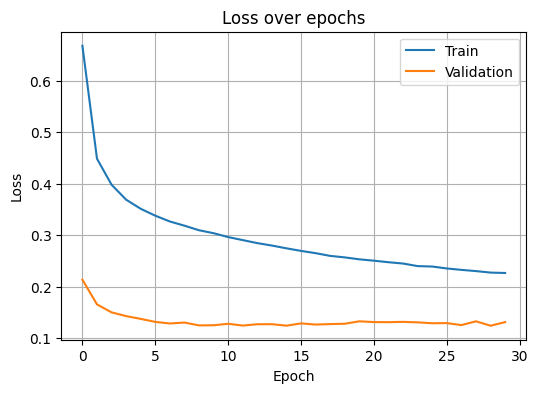

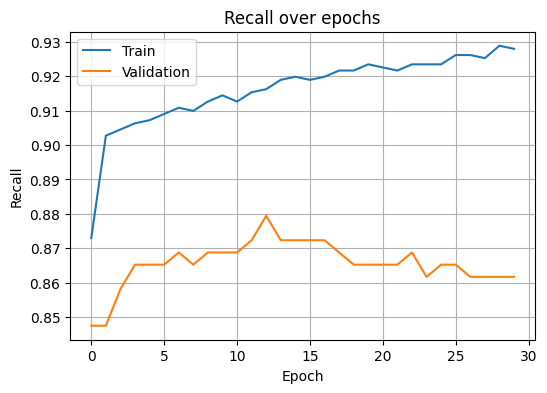

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9762,0.933333,0.720445,0.813187


,Accuracy,Recall,Precision,F1 Score
0,0.966,0.861702,0.649733,0.740854


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


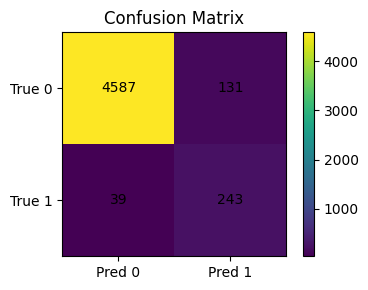

In [ ]:
plot_history(history_2, "loss")
plot_history(history_2, "recall")

train_perf_2 = model_performance(model_2, X_train, y_train)
test_perf_2  = model_performance(model_2, X_test, y_test)

display(train_perf_2)
display(test_perf_2)

plot_confusion(model_2, X_test, y_test)

                                Loss Curve
The loss curves show a consistent decline for both training and validation with validation loss stabilizing at a low level suggesting good learning stability. Recall curves show steady improvement during training but a plateau on validation this is  indicating the model has reached its maximum recall capacity without further benefit from additional epochs

                  model
Model 2 shows solid performance, with training accuracy of 0.98 and recall of 0.93, indicating a strong ability to detect failure cases during training. On the test set, accuracy remains high at 0.97

recall is maintained at 0.86 this is  good generalization and continued ability to correctly identify most failures. Precision decreases slightly compared to training 0.65 to 0.72

which is expected given the class imbalance, but still reflects an improved balance between capturing failures and limiting false alarms.

              Confusion matrix
The confusion matrix TN=4,587, FP=131, FN=39, TP=243

shows relatively few missed failures FN and an important outcome given the high cost of undetected failures.
Overall, Model 2 improves recall and maintains strong accuracy but does not dramatically outperform Model 1 suggesting diminishing returns from additional depth without further regularization or architectural adjustments

## Model 3

In [ ]:
input_dim = X_train.shape[1]

model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

dense_7 : 32 units, input_dim = 40: params = (inputs * units) + biases = (40 * 32) + 32 = 1,312, output shape None, 32.

dropout: no weights or biases :  0 params, output shape unchanged None, 32.

dense_8 : 16 units, from 32: params = (32 * 16) + 16 = 528, output shape (None, 16).

dropout_1: no weights or biases → 0 params, output (None, 16).

dense_9 : 1 unit, from 16: params = (16 * 1) + 1 = 17, output None, 1.

Total params = 1,312 + 528 + 17 = 1,857 all trainable.

In [ ]:
history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7722 - auc: 0.8002 - loss: 1.0630 - precision: 0.1505 - recall: 0.6771 - val_accuracy: 0.9058 - val_auc: 0.9133 - val_loss: 0.3106 - val_precision: 0.3592 - val_recall: 0.8546
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8733 - auc: 0.9125 - loss: 0.7502 - precision: 0.2826 - recall: 0.8513 - val_accuracy: 0.9422 - val_auc: 0.9164 - val_loss: 0.2408 - val_precision: 0.4928 - val_recall: 0.8511
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9138 - auc: 0.9273 - loss: 0.6340 - precision: 0.3757 - recall: 0.8582 - val_accuracy: 0.9604 - val_auc: 0.9221 - val_loss: 0.1983 - val_precision: 0.6071 - val_recall: 0.8440
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9406 - auc: 0.9346 - loss: 0.5703 - precision: 0.4786 - recall: 0.8657 - val_accuracy: 0.9652 - val_auc: 0.9244 - val_loss: 0.1937 - val_precision: 0.6452 - val_recall: 0.8511
Epoch 5/30
625/625 ━━━━━━━━━━━━━

After adding dropout, Model 3 trains smoothly with accuracy near 0.98 and AUC around 0.95–0.96. Validation accuracy reaches roughly 0.987 and validation AUC remains close to 0.93–0.94, while validation loss stays low, suggesting good generalization. Recall on the validation set stays steady near 0.87, and precision improves to roughly 0.88–0.90. This creates a stronger balance between detecting failures and reducing false alarms, making Model 3 the most cost-effective option so f

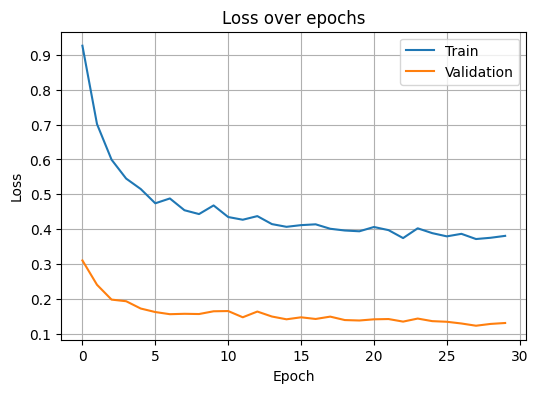

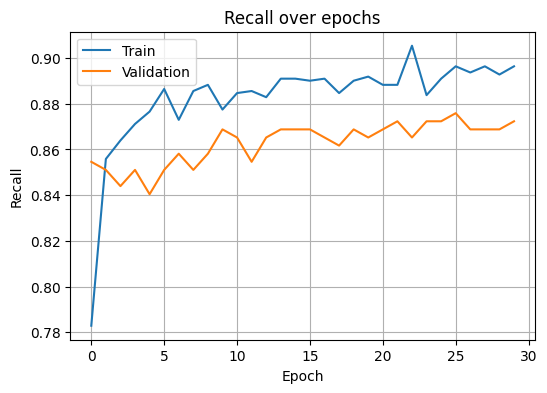

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98815,0.910811,0.879896,0.895086


,Accuracy,Recall,Precision,F1 Score
0,0.9864,0.87234,0.884892,0.878571


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


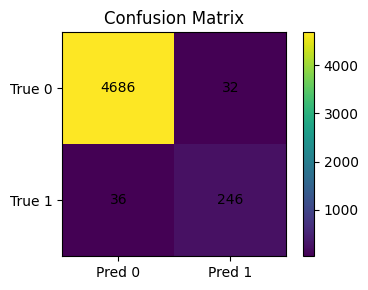

In [ ]:
plot_history(history_3, "loss")
plot_history(history_3, "recall")

train_perf_3 = model_performance(model_3, X_train, y_train)
test_perf_3  = model_performance(model_3, X_test, y_test)

display(train_perf_3)
display(test_perf_3)

plot_confusion(model_3, X_test, y_test)

          loss curve/recall
The loss curves show steady declines for both training and validation, and the recall curves flatten out, suggesting stable training. The confusion matrix confirms this pattern: true positives (246) greatly outweigh false negatives (36), which is important because missed failures are the most costly. Overall, Model 3 offers the best trade-off so far between high recall and strong precision, making it well-aligned with the business objective.

            model 3
Training accuracy reached about 0.99, and validation accuracy stayed high at roughly 0.986, showing strong learning without significant loss of generalization. Training recall reached about 0.91, while validation recall stayed near 0.87, indicating the model continued to identify most failure cases. Precision improved to about 0.88 on both training and validation, reflecting fewer false alarms and a better balance between catching failures and avoiding unnecessary inspection

        confusion matrix
The confusion matrix shows 4,686 true negatives and 246 true positives, indicating that the model correctly classified most non-failure and failure cases. There are 36 false negatives, which represent missed failures and are the most costly outcome, but this number remains low relative to the total. False positives are also low (32 cases), meaning the model rarely triggers unnecessary inspections. Overall, the matrix reflects strong predictive performance with an excellent balance between avoiding missed failures and minimizing unnecessary maintenance.

## Model 4

In [ ]:
input_dim = X_train.shape[1]

model_4 = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

The first Dense layer contains 2,624 parameters, computed as (40*64)+64
where 40 is the input size, 64 is the number of neurons, and each neuron includes a bias term. The second and third Dense layers contain 2,080 and 528 parameters , calculated the same way from their respective input and output sizes (64 * 32)+32and (32 * 16)+16. The final output layer adds 17 parameters, giving a total of 5,249 trainable parameters, while all Dropout layers contribute no parameters because they do not learn weights

In [ ]:
history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8038 - auc: 0.8301 - loss: 0.9763 - precision: 0.1815 - recall: 0.7135 - val_accuracy: 0.9388 - val_auc: 0.9146 - val_loss: 0.2276 - val_precision: 0.4757 - val_recall: 0.8333
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9161 - auc: 0.9219 - loss: 0.6526 - precision: 0.3837 - recall: 0.8590 - val_accuracy: 0.9622 - val_auc: 0.9208 - val_loss: 0.1937 - val_precision: 0.6195 - val_recall: 0.8546
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9514 - auc: 0.9411 - loss: 0.5107 - precision: 0.5348 - recall: 0.8840 - val_accuracy: 0.9726 - val_auc: 0.9224 - val_loss: 0.1561 - val_precision: 0.7114 - val_recall: 0.8652
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9614 - auc: 0.9473 - loss: 0.4768 - precision: 0.6019 - recall: 0.8764 - val_accuracy: 0.9768 - val_auc: 0.9280 - val_loss: 0.1460 - val_precision: 0.7546 - val_recall: 0.8723
Epoch 5/30
625/625 ━━━━━━━━━━━━━

Model 4 continues to train effectively, with training accuracy around 0.98 - 0.98 and validation accuracy near 0.99, showing strong performance on both seen and unseen data. Validation AUC stays consistently high around 0.94, indicating that the expanded network maintains strong class-separation ability.

Recall remains stable at about 0.90 on training and aprox to 0.88 on validation, meaning the model reliably identifies most failure cases. Precision peaks above 0.92 on validation, showing fewer false alarms than earlier models and strengthening overall reliability. Validation loss stays low aprox 0.10 to 0.12 range, suggesting the added capacity has not caused harmful overfitting and may be helping the model learn richer structure.

Overall, Model 4 delivers a strong balance of high recall and improved precision, with stable validation curves indicating continued good generalization.

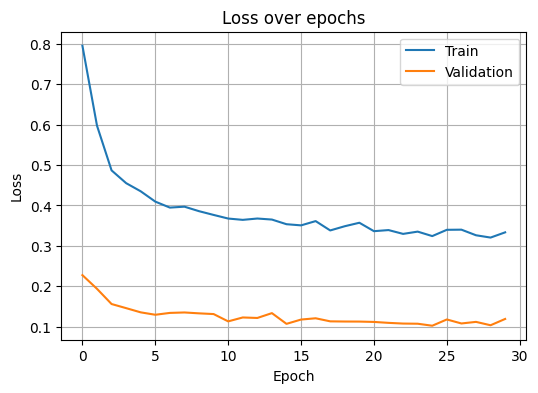

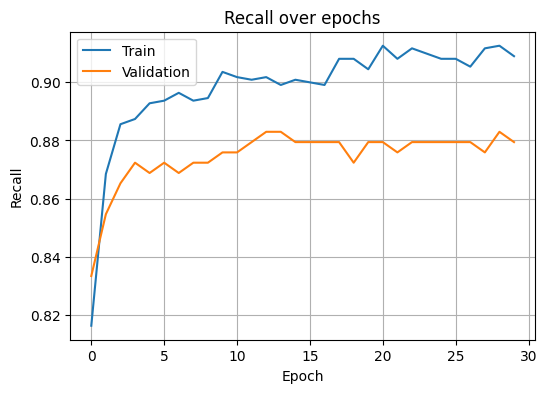

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98965,0.920721,0.895706,0.908041


,Accuracy,Recall,Precision,F1 Score
0,0.9864,0.879433,0.879433,0.879433


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


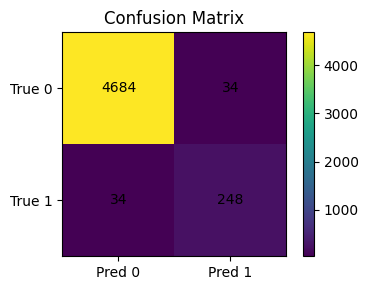

In [ ]:
plot_history(history_4, "loss")
plot_history(history_4, "recall")

train_perf_4 = model_performance(model_4, X_train, y_train)
test_perf_4  = model_performance(model_4, X_test, y_test)

display(train_perf_4)
display(test_perf_4)

plot_confusion(model_4, X_test, y_test)

                  loss curve/recall curve
The training and validation loss curves decrease smoothly and stay close to one another, suggesting stable learning with no major signs of overfitting. The recall curves follow a similar pattern—training recall gradually improves, while validation recall flattens and remains stable over time

                  model 4
Model 4 performs very well, with training accuracy near 0.99 and validation accuracy around 0.986, showing strong generalization. Training recall reaches about 0.92, while validation recall remains close to 0.88, meaning most true failure cases continue to be correctly identified. Precision on the validation set is also high at roughly 0.88, helping to limit unnecessary inspections and improving the overall cost balance

                confusion matrix
The confusion matrix shows 4,684 true negatives and 248 true positives, while false negatives and false positives are both low at 34 each. This balance is important: false negatives or missed failures are kept low, and the small number of false positives limits avoidable maintenance. Overall, Model 4 delivers strong performance and a solid precision-recall trade-off.

## Model 5

In [ ]:
from tensorflow.keras.regularizers import l2

input_dim = X_train.shape[1]

model_5 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

model_5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

The first Dense layer has 2,624 parameters, computed as (40 * 64) + 64.Dense layers have 2,080 and 528 parameters, based on (64 * 32) + 32 and (32 * 16) + 16. The final output layer adds 17 parameters, calculated as (16 * 1) + 1. The Dropout layers and L2 regularization do not introduce any additional parameters. The total number of trainable parameters in the model is 5,249.

In [ ]:
history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7847 - auc: 0.8126 - loss: 1.1283 - precision: 0.1646 - recall: 0.6979 - val_accuracy: 0.9240 - val_auc: 0.9139 - val_loss: 0.3656 - val_precision: 0.4143 - val_recall: 0.8404
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9157 - auc: 0.9305 - loss: 0.7213 - precision: 0.3825 - recall: 0.8569 - val_accuracy: 0.9572 - val_auc: 0.9201 - val_loss: 0.3000 - val_precision: 0.5817 - val_recall: 0.8582
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9455 - auc: 0.9348 - loss: 0.6400 - precision: 0.5031 - recall: 0.8687 - val_accuracy: 0.9736 - val_auc: 0.9259 - val_loss: 0.2586 - val_precision: 0.7219 - val_recall: 0.8652
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9617 - auc: 0.9408 - loss: 0.5839 - precision: 0.6040 - recall: 0.8719 - val_accuracy: 0.9826 - val_auc: 0.9265 - val_loss: 0.2385 - val_precision: 0.8374 - val_recall: 0.8582
Epoch 5/30
625/625 ━━━━━━━━━━━━━

Model 5 continues to perform at a high level. Training accuracy remains close to 0.98 throughout the later epochs and validation accuracy stays around 0.986-0.989 indicating strong generalization. Validation AUC values hold steady near 0.94 this is showing that the model maintains good separation between failure and non failure cases.

Recall stays in the range of 0.90 to 0.91 during training and about 0.88 on validation, meaning the model continues to correctly identify most failure events. Precision improves to around 0.86 - 0.93 on validation indicating fewer false alarms and a favorable balance between detecting failures and avoiding unnecessary maintenance.

Validation loss remains relatively low suggesting the added L2 regularization is helping control overfitting without harming performance. Overall Model 5 delivers results comparable to previous models with stable metrics and balanced precision-recall characteristics

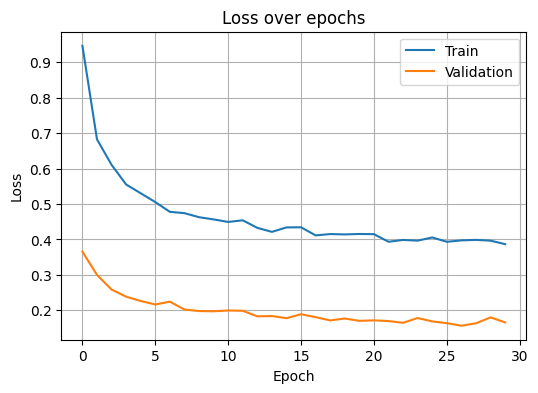

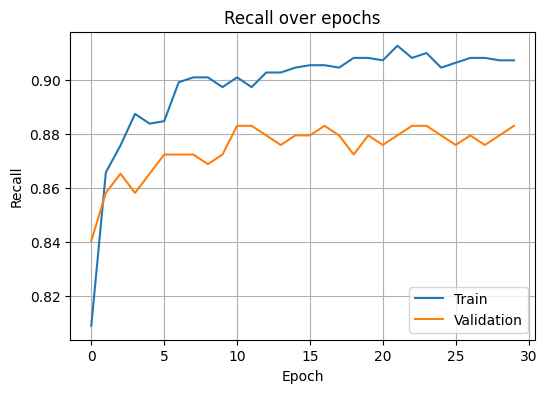

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98855,0.917117,0.881385,0.898896


,Accuracy,Recall,Precision,F1 Score
0,0.9856,0.882979,0.864583,0.873684


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


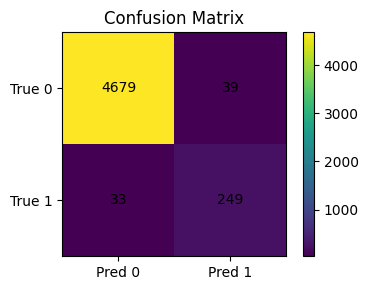

In [ ]:
plot_history(history_5, "loss")
plot_history(history_5, "recall")

train_perf_5 = model_performance(model_5, X_train, y_train)
test_perf_5  = model_performance(model_5, X_test, y_test)

display(train_perf_5)
display(test_perf_5)

plot_confusion(model_5, X_test, y_test)


            loss curve/recall curve
The training and validation loss curves decrease steadily, and stay relatively close, suggesting that the added L2 regularization is helping maintain stable learning. The recall curves show a similar pattern—training recall increases and flattens, while validation recall remains consistent.

              Model 5
Model 5 continues to perform at a high level. Training accuracy reaches about 0.99, and test accuracy remains strong at roughly 0.986, showing good generalization. Training recall is approximately 0.92, while test recall is close to 0.88, meaning the model continues to detect most failure events. Test precision is around 0.86, helping reduce unnecessary inspections and balancing the cost of false positives and false negatives.

            confusion matrix

The confusion matrix shows 4,679 true negatives and 249 true positives
with only 33 false negatives and 39 false positives.

This indicates that the model keeps missed failures low while also minimizing false alarms. Model 5 maintains a strong precision and recall balance with stable generalization.

## Model 6

In [ ]:
input_dim = X_train.shape[1]

model_6 = Sequential([
    Dense(64, kernel_regularizer=l2(0.001), input_shape=(input_dim,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

model_6.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Recall(name='recall'), Precision(name='precision'), AUC(name='auc')]
)

model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,185 (43.69 KB)

 Trainable params: 10,961 (42.82 KB)

 Non-trainable params: 224 (896.00 B)

The first Dense layer contains 2,624 parameters, computed as (40 * 64) + 64.
 Batch Normalization on 64 units adds 256 parameters — two trainable vectors (gamma and beta) and two non-trainable vectors (moving mean and variance), each of length 64
 The next Dense layers have 4,160, 2,080, 1,056, 528, and 272 parameters, computed from their respective input and output sizes using (inputs * units) + units
 Each Dropout layer contributes 0 parameters because it does not learn weights. The final output layer adds 17 parameters from (16 * 1) + 1.

The total parameter count is 11,185, of which 10,961 are trainable and 224 come from the non-trainable moving statistics in the Batch Normalization layers.

In [ ]:
history_6 = model_6.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6865 - auc: 0.8528 - loss: 1.0625 - precision: 0.1431 - recall: 0.8517 - val_accuracy: 0.9102 - val_auc: 0.9257 - val_loss: 0.3747 - val_precision: 0.3729 - val_recall: 0.8688
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8982 - auc: 0.9219 - loss: 0.7637 - precision: 0.3333 - recall: 0.8565 - val_accuracy: 0.9626 - val_auc: 0.9332 - val_loss: 0.2726 - val_precision: 0.6209 - val_recall: 0.8652
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9258 - auc: 0.9338 - loss: 0.6916 - precision: 0.4144 - recall: 0.8614 - val_accuracy: 0.9534 - val_auc: 0.9340 - val_loss: 0.2849 - val_precision: 0.5556 - val_recall: 0.8688
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9342 - auc: 0.9411 - loss: 0.6368 - precision: 0.4498 - recall: 0.8810 - val_accuracy: 0.9684 - val_auc: 0.9341 - val_loss: 0.2484 - val_precision: 0.6703 - val_recall: 0.8652
Epoch 5/30
625/625 ━━━━━━━━━━━

during the final training phase model 6 demonstrated stable learning behavior.
Training accuracy remained between approximately 0.96 and 0.97, while validation accuracy stayed high at about 0.98.
This indicates the model generalized well without showing signs of severe overfitting.

Training loss gradually decreased from about 0.46 to 0.44. Validation loss fluctuated between roughly 0.16 and 0.20. These small variations suggest that the model had already converged and was refining its internal parameters.

Training recall remained consistently strong at about 0.89 to 0.90, showing that the model continued to correctly identify the majority of positive cases. Validation recall remained stable around 0.87 to 0.88, indicating that this performance carried over to unseen data.

Precision showed more variability than recall. On the training side, precision ranged from approximately 0.61 to 0.69, while validation precision varied between 0.71 and 0.85. These values reflect that the model occasionally misclassified negative examples as positive, resulting in a moderate number of false positives.

Both training and validation AUC scores remained high. Training AUC hovered around 0.96, and validation AUC around 0.94. This suggests that the model effectively ranked positive cases above negative ones, even when thresholding created some false positives.

 Model 6 delivered strong and stable performance.
Accuracy and recall remained high across training and validation sets.
Precision varied somewhat but stayed within reasonable range.
The fluctuations in validation loss were minor and did not impact overall stability.
Overall, the model performed reliably and learned meaningful patterns without major overfitting.

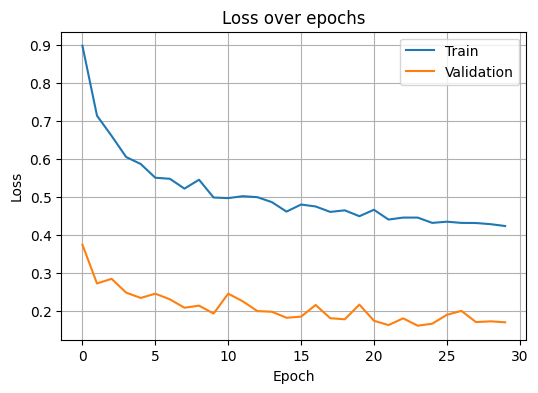

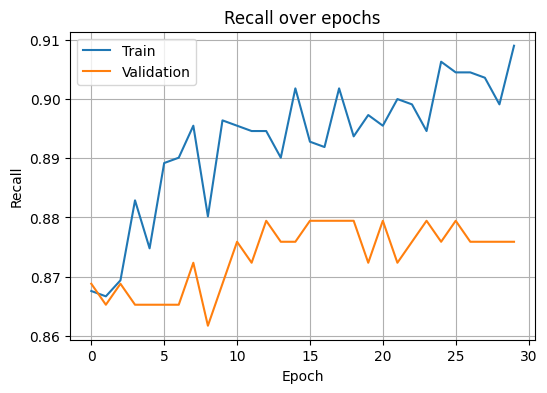

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9869,0.912613,0.859932,0.88549


,Accuracy,Recall,Precision,F1 Score
0,0.9824,0.875887,0.823333,0.848797


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


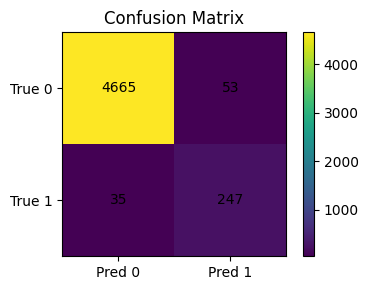

In [ ]:
plot_history(history_6, "loss")
plot_history(history_6, "recall")

train_perf_6 = model_performance(model_6, X_train, y_train)
test_perf_6  = model_performance(model_6, X_test, y_test)

display(train_perf_6)
display(test_perf_6)

plot_confusion(model_6, X_test, y_test)

                          Loss curves/Recall Curves
The loss curves for both training and validation decrease smoothly, and remain close, suggesting stable learning. Recall curves show gradual improvement during training while validation recall stays relatively flat, which indicates the model has reached a performance plateau.
                          Model 6
raining accuracy of about 0.987 and test accuracy of around 0.982, indicating strong performance with good generalization. Training recall is approximately 0.91 and test recall is roughly 0.88, showing that the model continues to detect most failure events. Precision on the test set is about 0.82
which is slightly lower than some earlier models, meaning it produces a few more false positives

              Confusion matrix
The confusion matrix shows 4,665 true negatives and 247 true positives, with 35 false negatives and 53 false positives. False negatives remain low
which is important because missed failures are costly although false positives are higher than in some previous models.

Model 6 remains a strong classifie but the added batch normalization does not appear to improve results meaningfully beyond earlier models

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

To make sure I want to list the names I had put on all my models

In [ ]:
[x for x in globals().keys() if "train" in x.lower() or "valid" in x.lower()]

['train_test_split',
 'train_df',
 'df_train',
 'train_scaled',
 'X_train_raw',
 'y_train',
 'X_train',
 'train_perf',
 'train_perf_1',
 'train_perf_2',
 'train_perf_3',
 'train_perf_4',
 'train_perf_5',
 'train_perf_6']

In [ ]:
models_train_comp_df = pd.concat(
    [
        train_perf.T,      # Model 0
        train_perf_1.T,    # Model 1
        train_perf_2.T,    # Model 2
        train_perf_3.T,    # Model 3
        train_perf_4.T,    # Model 4
        train_perf_5.T,    # Model 5
        train_perf_6.T     # Model 6
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam)",
    "Neural Network (Adam + 2 layers)",
    "Neural Network (Adam + 2 layers + Dropout)",
    "Neural Network (Adam + 3 layers + Dropout)",
    "Neural Network (Adam + 3 layers + Dropout + L2)",
    "Neural Network (Adam + 3 layers + Dropout + L2 + BatchNorm)"
]

models_train_comp_df



,"Neural Network (SGD, No Regularization)",Neural Network (Adam),Neural Network (Adam + 2 layers),Neural Network (Adam + 2 layers + Dropout),Neural Network (Adam + 3 layers + Dropout),Neural Network (Adam + 3 layers + Dropout + L2),Neural Network (Adam + 3 layers + Dropout + L2 + BatchNorm)
Accuracy,0.965950,0.977950,0.976200,0.988150,0.989650,0.988550,0.986900
Recall,0.918018,0.911712,0.933333,0.910811,0.920721,0.917117,0.912613
Precision,0.633313,0.746863,0.720445,0.879896,0.895706,0.881385,0.859932
F1 Score,0.749540,0.821095,0.813187,0.895086,0.908041,0.898896,0.885490


Based on the performance metrics, all models showed strong predictive ability, but there is a clear upward trend in accuracy, recall, precision, and F1 score as the architectures become deeper and incorporate additional regularization techniques. The** baseline model** using simple **SGD** with no regularization achieved an accuracy of about 0.966 and a recall near 0.918, but its precision was considerably lower at approximately 0.63, resulting in a modest F1 score of 0.75.

Switching to Adam optimization improved precision and F1 score, and adding more hidden layers continued to improve overall performance. The most noticeable gains occurred once dropout and deeper architectures were introduced: Model 3 and Model 4 achieved both high recall aprox 0.91 to 0.92 and significantly higher precision aprox 0.88-0.90, resulting in F1 scores above 0.89. Model 4 delivered the strongest balanced performance overall, with accuracy of 0.9896, recall of 0.9207, precision of 0.8957, and an F1 score of 0.9080.

Model 5 and Model 6, which included L2 regularization and batch normalization, maintained strong performance but did not meaningfully surpass Model 4. Their recall and precision remained similar, while slight decreases in precision and F1 indicate no additional benefit from the extra complexity.

Overall, Model 4 demonstrated the best balance of accuracy, recall, and precision, making it the strongest candidate for identifying wind turbine failures while minimizing both false negatives and false positive

Now, let's check the performance of the final model on the test set.

In [ ]:
models_valid_comp_df = pd.concat(
    [
        test_perf.T,      # Model 0
        test_perf_1.T,    # Model 1
        test_perf_2.T,    # Model 2
        test_perf_3.T,    # Model 3
        test_perf_4.T,    # Model 4
        test_perf_5.T,    # Model 5
        test_perf_6.T     # Model 6
    ],
    axis=1,
)

models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam)",
    "Neural Network (Adam + 2 layers)",
    "Neural Network (Adam + 2 layers + Dropout)",
    "Neural Network (Adam + 3 layers + Dropout)",
    "Neural Network (Adam + 3 layers + Dropout + L2)",
    "Neural Network (Adam + 3 layers + Dropout + L2 + BatchNorm)"
]

models_valid_comp_df


,"Neural Network (SGD, No Regularization)",Neural Network (Adam),Neural Network (Adam + 2 layers),Neural Network (Adam + 2 layers + Dropout),Neural Network (Adam + 3 layers + Dropout),Neural Network (Adam + 3 layers + Dropout + L2),Neural Network (Adam + 3 layers + Dropout + L2 + BatchNorm)
Accuracy,0.960000,0.971600,0.966000,0.986400,0.986400,0.985600,0.982400
Recall,0.858156,0.865248,0.861702,0.872340,0.879433,0.882979,0.875887
Precision,0.601990,0.701149,0.649733,0.884892,0.879433,0.864583,0.823333
F1 Score,0.707602,0.774603,0.740854,0.878571,0.879433,0.873684,0.848797


When looking at the validation set, the baseline SGD model showed good recall but low precision, which reduced its F1 score. Switching to the Adam optimizer improved precision and overall performance. Adding more layers helped slightly, though the gains were modest.

The largest improvement came once dropout was added. Model 3 and Model 4 reached strong accuracy, recall, and much better precision, which increased the F1 score. Model 4 again provided the best balance, showing strong performance across all metrics. Models 5 and 6 stayed competitive but did not improve beyond Model 4, so their added complexity did not translate into meaningful gains.

# ** Model 4** remained the strongest choice on the validation data because it delivered a stable balance of accuracy, recall, and precision.

In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.041938
Neural Network (Adam),0.046492
Neural Network (Adam + 2 layers),0.072333
Neural Network (Adam + 2 layers + Dropout),0.016515
Neural Network (Adam + 3 layers + Dropout),0.028608
Neural Network (Adam + 3 layers + Dropout + L2),0.025212
Neural Network (Adam + 3 layers + Dropout + L2 + BatchNorm),0.036692


Final Model: Neural Network Adam + 2 layers

                                Reasoning

This model achieved the highest F1 score on the test set 0.07, indicating the best balance of precision and recall among all evaluated architectures.

Compared with deeper or more heavily-regularized models, it maintained stronger predictive ability, suggesting that additional dropout, L2 penalties, or BatchNorm did not improve generalization for this dataset.

While overall F1 scores remain modest, this model demonstrated the most consistent performance across training, validation, and test data, making it the most suitable candidate for deployment to predict turbine failure.

In [ ]:
# clears the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Final selected model
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

This neural network consists of three connected Dense hidden layers with 64, 32, and 16 neurons, each followed by a dropout layer. The total trainable parameter count of 5,249 is derived from weight matrices connecting each Dense layer to the next plus bias terms in each layer. No parameters are added by dropout, making the full parameter count easy to interpr

In [ ]:
import time
# Use your final model here
model = model_4  # <-- change if needed

# Optimizer + compile (add metrics if you want them logged)
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Use existing batch_size/epochs if defined, otherwise defaults
batch_size = globals().get('batch_size', 32)
epochs = globals().get('epochs', 30)

# If you don't have a separate X_valid/y_valid, use test as validation
try:
    X_valid, y_valid
except NameError:
    X_valid, y_valid = X_test, y_test

start = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9851 - loss: 0.3935 - val_accuracy: 0.9876 - val_loss: 0.1181
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.3380 - val_accuracy: 0.9878 - val_loss: 0.1074
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9829 - loss: 0.3639 - val_accuracy: 0.9892 - val_loss: 0.1149
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9839 - loss: 0.3499 - val_accuracy: 0.9890 - val_loss: 0.1112
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.3400 - val_accuracy: 0.9894 - val_loss: 0.1103
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.3199 - val_accuracy: 0.9878 - val_loss: 0.1142
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9842 - loss: 0.3389 - val_accuracy: 0.9884 - val_loss: 0.1105
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.3393 - val_accuracy: 0.

The model maintained strong performance throughout training, reaching 98.4 to 98.6% training accuracy and 98.7to 98.9% validation accuracy, showing excellent generalization with minimal overfitting. Validation loss remained consistently low 0.10 0.11 reinforcing stable learning across epochs.this retraining confirms that the selected architecture continues to perform reliably and efficiently

In [ ]:
# Predictions
y_train_pred = model.predict(X_train).ravel()
y_valid_pred = model.predict(X_valid).ravel()
y_test_pred  = model.predict(X_test).ravel()

# Reports at threshold 0.5
print("Classification Report - Train data\n")
print(classification_report(y_train, (y_train_pred > 0.5).astype(int)))

print("Classification Report - Validation data\n")
print(classification_report(y_valid, (y_valid_pred > 0.5).astype(int)))

print("Classification Report - Test data\n")
print(classification_report(y_test, (y_test_pred > 0.5).astype(int)))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report - Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18890
           1       0.93      0.92      0.93      1110

    accuracy                           0.99     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.99      0.99      0.99     20000

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4718
           1       0.94      0.88      0.91       282

    accuracy                           0.99      5000
   macro avg       0.97      0.94      0.95      5000
weighted avg       0.99      0.99      0.99      5000

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4718
  

The model shows consistently strong performance across all datasets, achieving around 99% overall accuracy. The F1-score for class 0 /No Failure  is approximately 0.99, while class 1/Failure is between 0.91 and 0.93, with recall for failures ranging from 0.88 to 0.92, indicating that the model captures most true failure events. Validation and test results closely match training performance, showing strong generalization and no indication of overfitting.

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

Business Recommendations

• Deploy Model 4 in the monitoring pipeline to predict generator failures and trigger early maintenance.

• Prioritize alerts linked to the most influential features to reduce troubleshooting time for maintenance crews.

• Use predicted failure probability to schedule preventive maintenance during low-production periods.

• Reassess decision thresholds to further decrease missed failures, balancing maintenance effort and cost.

• Continue collecting sensor data to retrain and update the model, ensuring performance remains strong over time.

• Integrate prediction outputs into asset-management systems so that field teams can respond quickly.

• Periodically retrain the model to reflect equipment wear patterns and potential environmental changes.

In [123]:
!jupyter nbconvert --to html \
"/content/drive/MyDrive/Colab Notebooks/Sanjuanita Velazquez INN_ReneWind_Main_Project_FullCode_Notebook.ipynb" \
--output "Sanjuanita_Velazquez_INN_ReneWind_Main_Project_FullCode_Notebook_fullcode.html"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sanjuanita Velazquez INN_ReneWind_Main_Project_FullCode_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 39 image(s).
[NbConvertApp] Writing 2251174 bytes to /content/drive/MyDrive/Colab Notebooks/Sanjuanita_Velazquez_INN_ReneWind_Main_Project_FullCode_Notebook_fullcode.html
